# 볼린저 밴드 투자 전략

1. 파일 로드
2. 결측치와 이상치를 확인 및 제거
3. 시간과 종가 데이터를 가지고 데이터 프레임 생성
4. 이동 평균선 : 데이터 20개의 평균을 구해서 새로운 파생변수 생성
5. 상단 밴드 : 이동 편균선 + (2 * 데이터 20개의 표준편차)
6. 하단 밴드 : 이동 편균선 - (2 * 데이터 20개의 표준편차)
7. 구매 상태를 확인하는 파생변수 생성
8. 구매 상태 입력
9. 수익률 계산

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [247]:
df = pd.read_csv("../csv/AMZN.csv", index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [248]:
# 결측치와 이상치를 확인
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\4009164492.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [249]:
# 결측치와 이상치를 제외한 데이터프레임을 생성
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\482443695.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [250]:
# case 1
price_df = df[['Adj Close']]
# case 2
price_df2 = df.loc[:, ['Adj Close']]

In [251]:
# 이동 평균선
# 데이터 20갸의 평균의 값
# 현재 날짜에서 과거 20일치의 데이터의 평균

price_df['center'] = price_df['Adj Close'].rolling(20).mean()

C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\3074272813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['center'] = price_df['Adj Close'].rolling(20).mean()


In [252]:
price_df.iloc[18:25]

,Adj Close,center
Date,,
1997-06-11,1.541667,NaN
1997-06-12,1.604167,1.574740
1997-06-13,1.583333,1.555990
1997-06-16,1.572917,1.548177
1997-06-17,1.505208,1.538021
1997-06-18,1.510417,1.531771
1997-06-19,1.510417,1.535938


In [253]:
# 상단 밴드 생성
# ub : 이동평균선 + (2 * 종가 데이터 20개의 표준편차(std()))
price_df['ub'] = price_df['center'] + (2 * price_df['Adj Close'].rolling(20).std())
# 하단 밴드 생성
# lb : 이동평균선 - (2 * 종가 데이터 20개의 표준편차(std()))
price_df['lb'] = price_df['center'] - (2 * price_df['Adj Close'].rolling(20).std())

C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\4263341794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['ub'] = price_df['center'] + (2 * price_df['Adj Close'].rolling(20).std())
C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\4263341794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['lb'] = price_df['center'] - (2 * price_df['Adj Close'].rolling(20).std())


<Axes: xlabel='Date'>

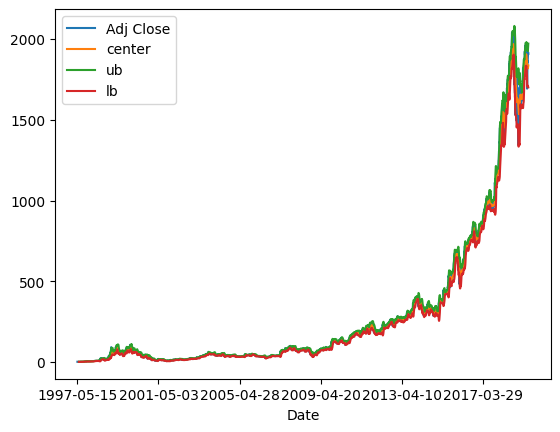

In [254]:
price_df.plot()

In [255]:
# 시작 시간 생성
start_time = '2010-01-02'
price_df2 = price_df.loc[start_time:]

In [256]:
# 거래 내역 파생변수 생성
# 비어있는 값
price_df2['trade'] = ""
price_df2.head()

C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\336680799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['trade'] = ""


,Adj Close,center,ub,lb,trade
Date,,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556,
2010-01-05,134.690002,133.839500,141.132776,126.546225,
2010-01-06,132.250000,133.741500,141.066419,126.416581,
2010-01-07,130.000000,133.536000,141.045671,126.026329,
2010-01-08,133.520004,133.646500,141.082939,126.210062,


## 구매내역 추가

- 조건
    1. 상단 밴드보다 종가가 높은 경우
        - 현재 구매 상태인 경우
            - 매도(trade = "buy") -> (trade = "")
        - 현재 구매 상태가 아닌 경우
            - 아무 행동도 하지 않는다(trade = "") -> (trade = "")
    2. 하단 밴드보다 종가가 낮은 경우
        - 현재 구매 상태인 경우
            - 아무 행동도 하지 않는다(trade = "buy") -> (trade = "buy")
        - 현재 구매 상태가 아닌 경우
            - 매수(trade = "") -> (trade = "buy")
    3. 하단 밴드와 상단 밴드 사이에 종가가 존재하는 경우
        - 현재 구매 상태인 경우
            - 아무 행동도 하지 않는다(trade = "buy") -> (trade = "buy")
        - 현재 구매 상태가 아닌 경우
            - 아무 행동도 하지 않는다(trade = "") -> (trade = "")

In [257]:
# 반복문
for i in price_df2.index:
    # 상단 밴드보다 존가가 높은 경우
    if price_df2.loc[i, 'Adj Close'] > price_df2.loc[i, 'ub']:
        # 현재 구매 상태인 경우(전날의 trade = "buy")
        if price_df2.shift(1).loc[i, 'trade'] == "buy":
            # 매도
            price_df2.loc[i, 'trade'] = ""
        else:
            price_df2.loc[i, 'trade'] = ""
    # 하단 밴드보다 종가가 낮은 경우
    elif price_df2.loc[i, 'Adj Close'] < price_df2.loc[i, 'lb']:
        # 현재 구매 상태인 경우
        if price_df2.shift(1).loc[i, 'trade'] == "buy":
            # 현 상태 유지
            price_df2.loc[i, 'trade'] = "buy"
        else:
            price_df2.loc[i, 'trade'] = "buy"
    # 현재 종가가 상단 밴드롸 하단 밴드 사이에 있는 경우
    elif price_df2.loc[i, 'Adj Close'] >= price_df2.loc[i, 'lb'] and price_df2.loc[i, 'Adj Close'] <= price_df2.loc[i, 'ub']:
        # 현재 구매 상태인 경우
        if price_df2.shift(1).loc[i, 'trade'] == "buy":
            # 현 상태 유지
            price_df2.loc[i, 'trade'] = "buy"
        else:
            price_df2.loc[i, 'trade'] = ""

In [258]:
price_df2['trade'].value_counts()

       1521
buy     863
Name: trade, dtype: int64

In [259]:
# apply를 이용하여 구매 내역 추가
def bol(x):
    close = x[0]
    ub = x[1]
    lb = x[2]
    trade = price_df2.shift(1)[(price_df2['Adj Close'] == close) & (price_df2['ub'] == ub) & (price_df2['lb'] == lb)]['trade'].values
    if close > ub:
        return ""
    elif close < lb:
        return "buy"
    else:
        if trade == 'buy':
            return 'buy'
        else:
            return ""
price_df2[["Adj Close", 'ub', 'lb']].apply(bol, axis=1, raw=1).value_counts()

       1521
buy     863
dtype: int64

## 수익율 계산
- 구매한 날의 종가
    - trade 컬럼에서 전 행의 trade가 "", 현재 행의 trade가 "buy"인 날의 종가 = 구매가격
- 판매한 날의 종가
    - trade 컬럼에서 전 행의 trade가 "buy", 현재 행의 trade가 ""인 날의 종가 = 판매가격
- 수익율 계산
    - (판매가격 - 구매가격) / 구매가격 + 1
- 구매가격과 판매가격 초기화
- 여러개의 수익율 발생
- 누적 수익율
    - 수익율 누적으로 곱

In [260]:
# 손익 계산
rtn = 1.0
price_df2['return'] = 1
# 구매 가격과 판매 가격 변수 생성
buy = 0.0
sell = 0.0

for i in price_df2.index:
    # 구매 가격 확인
    if price_df2.shift(1).loc[i, 'trade'] == "" and price_df2.loc[i, 'trade'] == 'buy':
        buy = price_df2.loc[i, 'Adj Close']
        print('구매일 : ', i, '구매가격 : ', buy)
    # 판매 가격 확인
    elif price_df2.shift(1).loc[i, 'trade'] == "buy" and price_df2.loc[i, 'trade'] == "":
        sell = price_df2.loc[i, 'Adj Close']
        # 수익율 계산
        rtn = (sell - buy) / buy + 1
        # 수익율을 return 컬럼에 대입
        price_df2.loc[i, 'return'] = rtn
        print('판매일 : ', i, '판매가격 : ', sell, '수익율 : ', round(rtn, 4))
    
    # 구매가격과 판매가격을 초기화
    if price_df2.loc[i, 'trade'] == "":
        buy = 0.0
        sell = 0.0

C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\3498481184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['return'] = 1


구매일 :  2010-05-04 구매가격 :  129.830002
판매일 :  2010-08-04 판매가격 :  127.580002 수익율 :  0.9827
구매일 :  2010-11-16 구매가격 :  157.779999
판매일 :  2010-11-24 판매가격 :  177.25 수익율 :  1.1234
구매일 :  2011-01-21 구매가격 :  177.419998
판매일 :  2011-03-30 판매가격 :  179.419998 수익율 :  1.0113
구매일 :  2011-06-06 구매가격 :  185.690002
판매일 :  2011-06-27 판매가격 :  201.25 수익율 :  1.0838
구매일 :  2011-08-04 구매가격 :  201.479996
판매일 :  2011-10-14 판매가격 :  246.710007 수익율 :  1.2245
구매일 :  2011-10-26 구매가격 :  198.399994
판매일 :  2012-01-18 판매가격 :  189.440002 수익율 :  0.9548
구매일 :  2012-10-10 구매가격 :  244.990005
판매일 :  2012-11-29 판매가격 :  251.270004 수익율 :  1.0256
구매일 :  2013-04-29 구매가격 :  249.740005
판매일 :  2013-06-07 판매가격 :  276.869995 수익율 :  1.1086
구매일 :  2013-08-14 구매가격 :  291.339996
판매일 :  2013-09-18 판매가격 :  312.029999 수익율 :  1.071
구매일 :  2014-01-24 구매가격 :  387.600006
판매일 :  2014-03-05 판매가격 :  372.369995 수익율 :  0.9607
구매일 :  2014-03-24 구매가격 :  351.850006
판매일 :  2014-06-05 판매가격 :  323.570007 수익율 :  0.9196
구매일 :  2014-09-15 구매가격 :  323.890015
판매일 

In [261]:
price_df2.loc['2010-08-04']

Adj Close    127.580002
center          119.719
ub           125.445332
lb           113.992669
trade                  
return          0.98267
Name: 2010-08-04, dtype: object

In [262]:
# 누적 수익율
# 수익율 변수 생성
acc_rtn = 1.0

for i in price_df2.index:
    rtn = price_df2.loc[i, 'return']
    acc_rtn = acc_rtn * rtn
    price_df2['acc_rtn'] = acc_rtn

print('누적 수익율 : ', round(acc_rtn,4))

누적 수익율 :  3.1381


C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\2433948240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['acc_rtn'] = acc_rtn


In [263]:
# 데이터프레임에서 첫번째 인덱스 출력
buy = price_df2.iloc[0,0]

In [264]:
# 데이터프레임에서 마지막 인덱스 출력
sell = price_df2.iloc[-1, 0]

In [265]:
(sell - buy) / buy + 1

14.249095911087197

# 볼린저 밴드를 함수화
- 1번 함수 생성
    - 매개변수는 데이터프레임, 기준이 되는 컬럼, 시작시간
    - 데이터프레임의 결측치와 이상치 제거
    - 기준이 되는 컬럼을 제외하고 나머지 컬럼 삭제
    - 이동 평균선, 상단 밴드, 하단 밴드 파생변수 생성
    - 시작 시간부터 마지막 시간까지의 데이터프레임을 필터링 한 뒤, 데이터프레임을 리턴
- 2번 함수 생성
    - 매개변수 데이터프레임
    - trade 컬럼을 생성 -> ""
    - 구매내역을 trade 컬럼에 대입 후 데이터프레임 리턴
- 3번 함수 생성
    - 매개변수 데이터프레임
    - return 컬럼을 생성 -> 1
    - 손익 계산을 하여 return 컬럼에 대입
    - 누적 수익율 acc_rtn 컬럼을 생성하고, 누적 수익율을 대입
    - 누적 수익율을 리턴

In [266]:
# 1번 함수 생성
def first(_df, _col, _time):
    # 결측치와 이상치 제거
    result = _df[~_df.isin([np.nan, np.inf, -np.inf]).any(1)]
    # 기준이 되는 컬럼을 제외한 나머지 컬럼 삭제
    result = result.loc[:, [_col]]
    # 이동 평균선, 상단 밴드, 하단 밴드 생성
    result['center'] = result[_col].rolling(20).mean()
    result['ub'] = result['center'] + (2 * result[_col].rolling(20).std())
    result['lb'] = result['center'] - (2 * result[_col].rolling(20).std())

    # 시작 시간부터 마지막 데이터까지 필터링
    result = result.loc[_time:]

    # 결과를 리턴
    return result

In [267]:
df = pd.read_csv('../csv/AAPL.csv', index_col='Date')

In [268]:
df = first(df, 'Close', '2013-01-01')

C:\Users\ezen\AppData\Local\Temp\ipykernel_1440\140315003.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = _df[~_df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [269]:
# 2번 함수 생성
def second(_df):
    # trade 컬럼 생성 -> ""
    result = _df
    result['trade'] = ""
    # 기준이 되는 컬럼의 이름은 가변
    # 위치는 변하지 않기 때문에
    # 기준이 되는 컬럼은 첫번째
    col = result.columns[0]

    # trade 내역 추가
    for i in result.index:
        # 기준이 되는 컬럼이 상단 밴드보다 큰 경우
        if result.loc[i, col] > result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == 'buy':
                result.loc[i, 'trade'] = ''
            else:
                result.loc[i, 'trade'] = ''
        # 기준이 되는 컬럼이 상단 밴드보다 작은 경우
        elif result.loc[i, col] < result.loc[i, 'lb']:
            if result.shift(1).loc[i, 'trade'] == 'buy':
                result.loc[i, 'trade'] = 'buy'
            else:
                result.loc[i, 'trade'] = 'buy'
        # 기준이 되는 컬럼이 하단 밴드와 상단 밴드 사이에 존재하는 경우
        elif result.loc[i, col] >= result.loc[i, 'lb'] and result.loc[i, col] <= result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == 'buy':
                result.loc[i, 'trade'] = 'buy'
            else:
                result.loc[i, 'trade'] = ''
    return result

In [270]:
df = second(df)

In [271]:
def third(_df):
    result = _df
    # return 컬럼 생성 -> 1
    result['return'] = 1
    # 기준이 되는 컬럼
    col = result.columns[0]
    # 수익율, 구매 가격, 판매 가격 변수 생성
    rtn = 1.0
    buy = 0.0
    sell = 0.0

    # 수익율 계산하는 반복문
    for i in result.index:
        # 구매 가격을 출력
        if result.shift(1).loc[i, 'trade'] == "" and result.loc[i, 'trade'] == 'buy':
            buy = result.loc[i, col]
            print('구매 일자 : ', i, '구매 가격 : ', buy)
        elif result.shift(1).loc[i, 'trade'] == "buy" and result.loc[i, 'trade'] == "":
            sell = result.loc[i, col]
            rtn = (sell - buy) / buy + 1
            result.loc[i, 'return'] = rtn
            print('판매 일자 : ', i, '판매 가격 : ', sell, '수익율 : ', round(rtn, 4))
    
    # buy, sell 값 초기화
    if result.loc[i, 'trade'] == "":
        buy = 0.0
        sell = 0.0
    
    # 누적 수익율 게산
    acc_rtn = 1.0

    for i in result.index:
        rtn = result.loc[i, 'return']
        acc_rtn = acc_rtn * rtn
        result.loc[i, 'acc_rtn'] = acc_rtn
    
    print('누적 수익율 : ', round(acc_rtn, 4))

    return result

In [272]:
third(df)

구매 일자 :  2013-01-15 구매 가격 :  69.417145
판매 일자 :  2013-07-29 판매 가격 :  63.970001 수익율 :  0.9215
구매 일자 :  2013-09-11 구매 가격 :  66.815712
판매 일자 :  2013-10-18 판매 가격 :  72.69857 수익율 :  1.088
구매 일자 :  2014-01-03 구매 가격 :  77.28286
판매 일자 :  2014-03-25 판매 가격 :  77.855713 수익율 :  1.0074
구매 일자 :  2014-10-15 구매 가격 :  97.540001
판매 일자 :  2014-10-23 판매 가격 :  104.830002 수익율 :  1.0747
구매 일자 :  2014-12-12 구매 가격 :  109.730003
판매 일자 :  2015-01-28 판매 가격 :  115.309998 수익율 :  1.0509
구매 일자 :  2015-03-11 구매 가격 :  122.239998
판매 일자 :  2015-04-23 판매 가격 :  129.669998 수익율 :  1.0608
구매 일자 :  2015-06-29 구매 가격 :  124.529999
판매 일자 :  2015-07-20 판매 가격 :  132.070007 수익율 :  1.0605
구매 일자 :  2015-08-04 구매 가격 :  114.639999
판매 일자 :  2015-10-22 판매 가격 :  115.5 수익율 :  1.0075
구매 일자 :  2015-12-14 구매 가격 :  112.480003
판매 일자 :  2016-03-01 판매 가격 :  100.529999 수익율 :  0.8938
구매 일자 :  2016-04-27 구매 가격 :  97.82
판매 일자 :  2016-05-25 판매 가격 :  99.620003 수익율 :  1.0184
구매 일자 :  2016-06-20 구매 가격 :  95.099998
판매 일자 :  2016-07-18 판매 가격 :  99.830002 수익율

,Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2013-01-02,78.432854,75.742428,80.299680,71.185175,,1.0,1.000000
2013-01-03,77.442856,75.501356,78.991046,72.011667,,1.0,1.000000
2013-01-04,75.285713,75.417142,78.838220,71.996064,,1.0,1.000000
2013-01-07,74.842857,75.250428,78.420993,72.079863,,1.0,1.000000
2013-01-08,75.044289,75.193714,78.334816,72.052611,,1.0,1.000000
...,...,...,...,...,...,...,...
2019-06-18,198.449997,185.432500,201.032574,169.832427,buy,1.0,1.355366
2019-06-19,197.869995,185.996000,202.558154,169.433846,buy,1.0,1.355366
2019-06-20,199.460007,186.830000,204.361771,169.298229,buy,1.0,1.355366


In [273]:
import bollinger as bb

In [274]:
df = pd.read_csv('../csv/BND.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-10,75.070000,75.260002,75.000000,75.239998,51.523693,35000
2007-04-11,75.160004,75.290001,75.029999,75.040001,51.386742,87700
2007-04-12,75.059998,75.080002,74.959999,75.029999,51.379879,78100
2007-04-13,75.040001,75.070000,74.849998,74.910004,51.297688,18000
2007-04-16,74.989998,74.989998,74.940002,74.980003,51.345627,52700


In [275]:
df = bb.first(df, 'Adj Close', '2011-01-01')
df.head()

c:\Users\ezen\Desktop\KMJ\230318\bollinger\__init__.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = _df[~_df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Adj Close,center,ub,lb
Date,,,,
2011-01-03,64.215347,64.013149,64.616070,63.410227
2011-01-04,64.223389,63.983159,64.463678,63.502641
2011-01-05,63.943043,63.962609,64.410380,63.514838
2011-01-06,63.999104,63.961561,64.408864,63.514259
2011-01-07,64.239395,63.969743,64.431591,63.507896


In [276]:
df = bb.second(df)
df.head()

,Adj Close,center,ub,lb,trade
Date,,,,,
2011-01-03,64.215347,64.013149,64.616070,63.410227,
2011-01-04,64.223389,63.983159,64.463678,63.502641,
2011-01-05,63.943043,63.962609,64.410380,63.514838,
2011-01-06,63.999104,63.961561,64.408864,63.514259,
2011-01-07,64.239395,63.969743,64.431591,63.507896,


In [277]:
df = bb.third(df)
df.head()

구매 일자 :  2011-02-03 구매 가격 :  63.937851
판매 일자 :  2011-03-16 판매 가격 :  65.105652 수익율 :  1.0183
구매 일자 :  2011-06-29 구매 가격 :  66.049957
판매 일자 :  2011-08-01 판매 가격 :  67.197464 수익율 :  1.0174
구매 일자 :  2011-11-30 구매 가격 :  68.584297
판매 일자 :  2011-12-13 판매 가격 :  69.032143 수익율 :  1.0065
구매 일자 :  2012-03-14 구매 가격 :  69.140411
판매 일자 :  2012-04-10 판매 가격 :  70.015167 수익율 :  1.0127
구매 일자 :  2012-08-15 구매 가격 :  71.121567
판매 일자 :  2013-02-25 판매 가격 :  71.270378 수익율 :  1.0021
구매 일자 :  2013-05-10 구매 가격 :  71.452927
판매 일자 :  2013-09-18 판매 가격 :  69.627502 수익율 :  0.9745
구매 일자 :  2013-12-24 구매 가격 :  69.648918
판매 일자 :  2014-02-03 판매 가격 :  70.937912 수익율 :  1.0185
구매 일자 :  2014-09-10 구매 가격 :  72.17923
판매 일자 :  2014-10-01 판매 가격 :  72.65773 수익율 :  1.0066
구매 일자 :  2015-02-17 구매 가격 :  73.605263
판매 일자 :  2015-03-18 판매 가격 :  74.53598 수익율 :  1.0126
구매 일자 :  2015-04-28 구매 가격 :  74.316902
판매 일자 :  2015-07-08 판매 가격 :  73.50975 수익율 :  0.9891
구매 일자 :  2015-10-29 구매 가격 :  73.890236
판매 일자 :  2015-12-01 판매 가격 :  74.04142 수익율 :  

,Adj Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2011-01-03,64.215347,64.013149,64.616070,63.410227,,1.0,1.0
2011-01-04,64.223389,63.983159,64.463678,63.502641,,1.0,1.0
2011-01-05,63.943043,63.962609,64.410380,63.514838,,1.0,1.0
2011-01-06,63.999104,63.961561,64.408864,63.514259,,1.0,1.0
2011-01-07,64.239395,63.969743,64.431591,63.507896,,1.0,1.0


In [278]:
df = pd.read_csv('../csv/BND.csv', index_col='Date')
df = bb.third(bb.second(bb.first(df, 'Adj Close', '2011-01-01')))
df.head()

c:\Users\ezen\Desktop\KMJ\230318\bollinger\__init__.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = _df[~_df.isin([np.nan, np.inf, -np.inf]).any(1)]


구매 일자 :  2011-02-03 구매 가격 :  63.937851
판매 일자 :  2011-03-16 판매 가격 :  65.105652 수익율 :  1.0183
구매 일자 :  2011-06-29 구매 가격 :  66.049957
판매 일자 :  2011-08-01 판매 가격 :  67.197464 수익율 :  1.0174
구매 일자 :  2011-11-30 구매 가격 :  68.584297
판매 일자 :  2011-12-13 판매 가격 :  69.032143 수익율 :  1.0065
구매 일자 :  2012-03-14 구매 가격 :  69.140411
판매 일자 :  2012-04-10 판매 가격 :  70.015167 수익율 :  1.0127
구매 일자 :  2012-08-15 구매 가격 :  71.121567
판매 일자 :  2013-02-25 판매 가격 :  71.270378 수익율 :  1.0021
구매 일자 :  2013-05-10 구매 가격 :  71.452927
판매 일자 :  2013-09-18 판매 가격 :  69.627502 수익율 :  0.9745
구매 일자 :  2013-12-24 구매 가격 :  69.648918
판매 일자 :  2014-02-03 판매 가격 :  70.937912 수익율 :  1.0185
구매 일자 :  2014-09-10 구매 가격 :  72.17923
판매 일자 :  2014-10-01 판매 가격 :  72.65773 수익율 :  1.0066
구매 일자 :  2015-02-17 구매 가격 :  73.605263
판매 일자 :  2015-03-18 판매 가격 :  74.53598 수익율 :  1.0126
구매 일자 :  2015-04-28 구매 가격 :  74.316902
판매 일자 :  2015-07-08 판매 가격 :  73.50975 수익율 :  0.9891
구매 일자 :  2015-10-29 구매 가격 :  73.890236
판매 일자 :  2015-12-01 판매 가격 :  74.04142 수익율 :  

,Adj Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2011-01-03,64.215347,64.013149,64.616070,63.410227,,1.0,1.0
2011-01-04,64.223389,63.983159,64.463678,63.502641,,1.0,1.0
2011-01-05,63.943043,63.962609,64.410380,63.514838,,1.0,1.0
2011-01-06,63.999104,63.961561,64.408864,63.514259,,1.0,1.0
2011-01-07,64.239395,63.969743,64.431591,63.507896,,1.0,1.0
